In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('C:/Users/ganes/OneDrive/Desktop/Individual  Projects/employee-attrition-prediction/Data/cleaned/cleaned_employee_data.csv')
df.shape


(1470, 31)

In [2]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)


C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:
print("Logistic Regression Results:\n", classification_report(y_test, log_preds))
print("XGBoost Results:\n", classification_report(y_test, xgb_preds))


Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       1.00      0.19      0.32        47

    accuracy                           0.87       294
   macro avg       0.93      0.60      0.62       294
weighted avg       0.89      0.87      0.83       294

XGBoost Results:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.72      0.28      0.40        47

    accuracy                           0.87       294
   macro avg       0.80      0.63      0.66       294
weighted avg       0.85      0.87      0.84       294



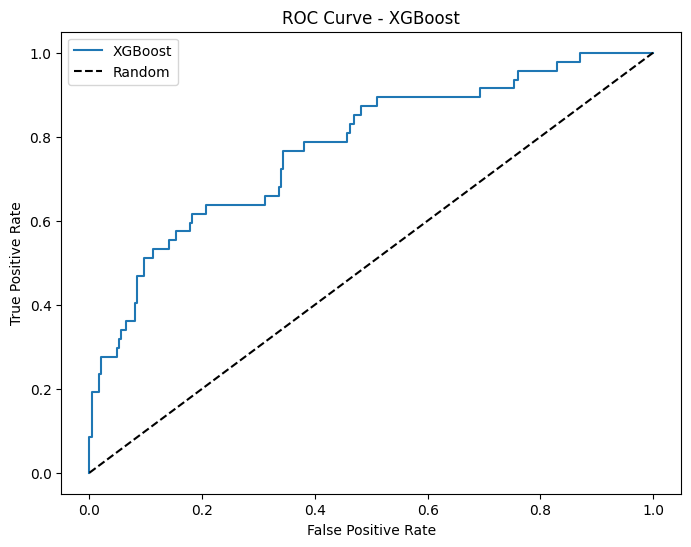

XGBoost ROC-AUC Score: 0.7747437333103627


In [6]:
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, xgb_probs))
